In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# importing data
df=pd.read_csv("data/Bengaluru_h_Data.csv")

In [3]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [4]:
df.shape

(13320, 9)

In [5]:
df.keys()

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [6]:
# dropping less importent features
df1=df.drop(['availability','society','balcony'],axis=1)
df1.head()

,area_type,location,size,total_sqft,bath,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
df1['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [8]:
df1.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [9]:
df1.location.value_counts()

Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1305, dtype: int64

In [10]:
len(df1['location'].value_counts())

1305

In [11]:
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
df1.isna().sum()

area_type      0
location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [13]:
# remove the NA values

df2=df1.dropna()

In [14]:
df2.isna().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [15]:
df2.shape

(13246, 6)

In [16]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [17]:
# extracting only numeric bedroom value from size features

df2['bedroom'] =df2['size'].apply(lambda x : int(x.split(" ")[0]))
df2.head(2)

C:\Users\nilan\AppData\Local\Temp\ipykernel_16440\2850654587.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bedroom'] =df2['size'].apply(lambda x : int(x.split(" ")[0]))


,area_type,location,size,total_sqft,bath,price,bedroom
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4


In [18]:
df3=df2.drop(['size'],axis=1)
df3.head(2)

,area_type,location,total_sqft,bath,price,bedroom
0,Super built-up Area,Electronic City Phase II,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600,5.0,120.00,4


In [19]:
len(df3['location'].value_counts())

1304

In [20]:
df3['location']=df3['location'].apply(lambda x: x.strip())
location_val_stat=df3['location'].value_counts()

In [21]:
location_val_stat

Whitefield                        535
Sarjapur  Road                    392
Electronic City                   304
Kanakpura Road                    266
Thanisandra                       236
                                 ... 
Vasantapura main road               1
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Abshot Layout                       1
Name: location, Length: 1293, dtype: int64

In [22]:
len(location_val_stat[location_val_stat>10])

241

In [23]:
location_stat_less_10=location_val_stat[location_val_stat<10]

In [24]:
df4=df3[:]

In [25]:
df4['location']=df3.location.apply(lambda x:'others'if x in location_stat_less_10 else x )


In [26]:
df4.head(10)

,area_type,location,total_sqft,bath,price,bedroom
0,Super built-up Area,Electronic City Phase II,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600,5.0,120.00,4
2,Built-up Area,Uttarahalli,1440,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521,3.0,95.00,3
4,Super built-up Area,Kothanur,1200,2.0,51.00,2
5,Super built-up Area,Whitefield,1170,2.0,38.00,2
6,Super built-up Area,Old Airport Road,2732,4.0,204.00,4
7,Super built-up Area,Rajaji Nagar,3300,4.0,600.00,4
8,Super built-up Area,Marathahalli,1310,3.0,63.25,3
9,Plot Area,others,1020,6.0,370.00,6


In [27]:
df4.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [28]:
# fun to check which squre feet value not in numeric format

def check_float(x):
    try:
        float(x)
    except:
        return False
    return True
    

In [29]:
df4[~df4['total_sqft'].apply(check_float)].head(20)

,area_type,location,total_sqft,bath,price,bedroom
30,Super built-up Area,Yelahanka,2100 - 2850,4.0,186.000,4
122,Super built-up Area,Hebbal,3067 - 8156,4.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Super built-up Area,Sarjapur,1145 - 1340,2.0,43.490,2
188,Super built-up Area,KR Puram,1015 - 1540,2.0,56.800,2
410,Super built-up Area,Kengeri,34.46Sq. Meter,1.0,18.500,1
549,Super built-up Area,Hennur Road,1195 - 1440,2.0,63.770,2
648,Built-up Area,Arekere,4125Perch,9.0,265.000,9
661,Super built-up Area,Yelahanka,1120 - 1145,2.0,48.130,2
672,Built-up Area,others,3090 - 5002,4.0,445.000,4


In [30]:
# fun to convert a range to its median value's

def cnvrt_sqft_to_num(x):
    token=x.split("-")
    if len(token)==2:
        return((float(token[0])+float(token[1]))/2)
    try:
        return float(x)
    except:
        return None

In [31]:
cnvrt_sqft_to_num('1056')

1056.0

In [32]:
df5=df4[:]
df5.head()

,area_type,location,total_sqft,bath,price,bedroom
0,Super built-up Area,Electronic City Phase II,1056,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600,5.0,120.00,4
2,Built-up Area,Uttarahalli,1440,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521,3.0,95.00,3
4,Super built-up Area,Kothanur,1200,2.0,51.00,2


In [33]:
df5.total_sqft=df5.total_sqft.apply(cnvrt_sqft_to_num)
df5

,area_type,location,total_sqft,bath,price,bedroom
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Super built-up Area,Kothanur,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,3453.0,4.0,231.00,5
13316,Super built-up Area,others,3600.0,5.0,400.00,4
13317,Built-up Area,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2
13318,Super built-up Area,Padmanabhanagar,4689.0,4.0,488.00,4


In [34]:
df5.isna().sum()

area_type      0
location       0
total_sqft    46
bath           0
price          0
bedroom        0
dtype: int64

In [35]:
df5.dropna(inplace=True)

In [36]:
df5.isna().sum()

area_type     0
location      0
total_sqft    0
bath          0
price         0
bedroom       0
dtype: int64

In [37]:
df5.head()

,area_type,location,total_sqft,bath,price,bedroom
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Super built-up Area,Kothanur,1200.0,2.0,51.00,2


In [38]:
df5.shape

(13200, 6)

In [39]:
df5.dtypes

area_type      object
location       object
total_sqft    float64
bath          float64
price         float64
bedroom         int64
dtype: object

In [40]:
#assuming that every bedroom must be need 150sqft, every bathroom must be need 50 sqft & for hall, kitchen, balcony total need minimum 300 sqft

df5[df5['total_sqft']<(df5['bedroom']*150+df5['bath']*50+300)].head()

,area_type,location,total_sqft,bath,price,bedroom
9,Plot Area,others,1020.0,6.0,370.0,6
45,Plot Area,HSR Layout,600.0,9.0,200.0,8
68,Plot Area,Devarachikkanahalli,1350.0,7.0,85.0,8
70,Plot Area,others,500.0,3.0,100.0,3
78,Built-up Area,Kaval Byrasandra,460.0,1.0,22.0,2


In [41]:
# removing th outlayers
df6=df5[~(df5['total_sqft']<(df5['bedroom']*150+df5['bath']*30+200))]

In [42]:
df6 = df5[~(df5.total_sqft/df5.bedroom<300)]
df6.shape

(12456, 6)

In [43]:
df6.head()

,area_type,location,total_sqft,bath,price,bedroom
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Super built-up Area,Kothanur,1200.0,2.0,51.00,2


In [44]:
df6['price_per_sqft']=df6['price']*100000 /df6['total_sqft']

C:\Users\nilan\AppData\Local\Temp\ipykernel_16440\3412088666.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['price_per_sqft']=df6['price']*100000 /df6['total_sqft']


In [45]:
df6.head(3)

,area_type,location,total_sqft,bath,price,bedroom,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,62.00,3,4305.555556


In [46]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [47]:
df6.shape

(12456, 7)

In [48]:
# removing the price per sqare feet outlaiers

def remove_pps_outliers(df):
    df_output=pd.DataFrame()
    for key, value in df.groupby('location'):
        m=np.mean(value.price_per_sqft)
        st=np.std(value.price_per_sqft)
        taken_row = value[(value.price_per_sqft>=(m-st)) & (value.price_per_sqft<=(m+st))]
        df_output = pd.concat([df_output,taken_row],ignore_index=True)
    return df_output

In [49]:
df7 = remove_pps_outliers(df6)
df7.shape

(10222, 7)

In [50]:
df7.head()

,area_type,location,total_sqft,bath,price,bedroom,price_per_sqft
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,Built-up Area,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
4,Super built-up Area,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668


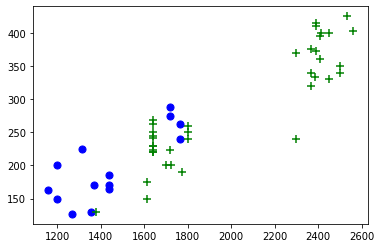

In [51]:
# into the dataframe we found some house price is greater than more bedroom house for a specific location

bhk2 = df7[(df7.location=="Rajaji Nagar") & (df7.bedroom==2)]
bhk3 = df7[(df7.location=="Rajaji Nagar") & (df7.bedroom==3)]

plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)

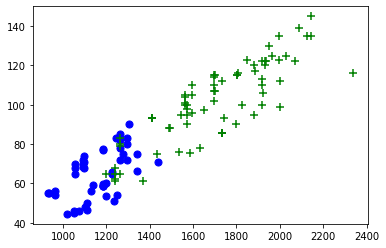

In [52]:
# into the dataframe we found some house price is greater than more bedroom house for a specific location

bhk2 = df7[(df7.location=="Thanisandra") & (df7.bedroom==2)]
bhk3 = df7[(df7.location=="Thanisandra") & (df7.bedroom==3)]

plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)

In [53]:
# from above chart we can see for "Thanisandra" location some 2bhk house price is greater than 3 bhk house, 
# its can create problem or error to pediction the model corectly.

In [54]:


def remove_bedroom_outliers(df):
    outliers_row=np.array([])
    for location, location_val in df.groupby('location'):
        stats={}
        for bhk, bhk_val in location_val.groupby('bedroom'):
            stats[bhk]={
                'mean':np.mean(bhk_val.price_per_sqft),
                'std':np.std(bhk_val.price_per_sqft),
                'count' :bhk_val.shape[0]
            }
        for bhk, bhk_val in location_val.groupby('bedroom'):
            prev_stats=stats.get(bhk-1)
            if prev_stats and prev_stats['count']>8:
                outliers_row=np.append(outliers_row , bhk_val[bhk_val.price_per_sqft<(prev_stats['mean'])].index.values)
    return df.drop(outliers_row,axis=0)       
            

In [55]:
df8=remove_bedroom_outliers(df7)

In [56]:
df8.shape

(7515, 7)

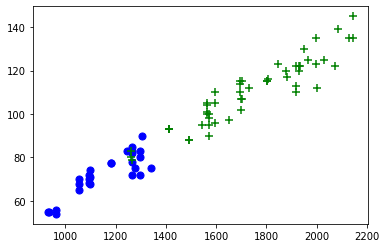

In [57]:
bhk2 = df8[(df8.location=="Thanisandra") & (df8.bedroom==2)]
bhk3 = df8[(df8.location=="Thanisandra") & (df8.bedroom==3)]

plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)

In [58]:
# removing the bath features outlaiers
# assume that every house cen have maximum ( total bedrooms + 1 guest ) bath space

df9=df8[~(df8['bath']>(df8['bedroom']+2))]

In [59]:
df9.shape

(7510, 7)

Text(0, 0.5, 'Count')

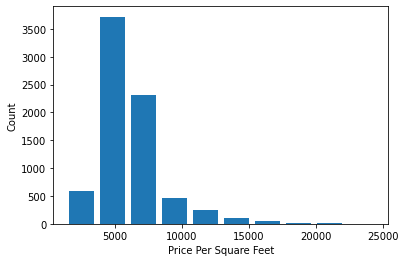

In [60]:
plt.hist(df9.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [61]:
df10=df9.drop(['price_per_sqft'],axis=1)

In [62]:
df10.head()

,area_type,location,total_sqft,bath,price,bedroom
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,428.0,4
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,194.0,3
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,235.0,3
3,Built-up Area,1st Block Jayanagar,1200.0,2.0,130.0,3
4,Super built-up Area,1st Block Jayanagar,1235.0,2.0,148.0,2


In [63]:
# assumed that data cleaning operations are completed
# now going towards create the model

In [64]:
import sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [65]:
df10['area_type'].unique()

array(['Super built-up  Area', 'Built-up  Area', 'Plot  Area',
       'Carpet  Area'], dtype=object)

In [66]:
# now area_type feature's categorical value convert to integer value based on alphabetical order.

le=LabelEncoder()
df10['area_type']=le.fit_transform(df10['area_type'])
le.classes_

array(['Built-up  Area', 'Carpet  Area', 'Plot  Area',
       'Super built-up  Area'], dtype=object)

In [67]:
df10.head()

,area_type,location,total_sqft,bath,price,bedroom
0,3,1st Block Jayanagar,2850.0,4.0,428.0,4
1,3,1st Block Jayanagar,1630.0,3.0,194.0,3
2,3,1st Block Jayanagar,1875.0,2.0,235.0,3
3,0,1st Block Jayanagar,1200.0,2.0,130.0,3
4,3,1st Block Jayanagar,1235.0,2.0,148.0,2


In [68]:
# now creating dummy variables for location features

In [69]:
dummies=pd.get_dummies(df10['location'])
dummies.head()

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
dummies.drop('others',axis=1)

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10213,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10214,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10217,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10218,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
df11=pd.concat([df10,dummies],axis=1)

In [72]:
df11.head(2)

,area_type,location,total_sqft,bath,price,bedroom,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
0,3,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
df12 = df11.drop('location',axis=1)
df12.head(2)

,area_type,total_sqft,bath,price,bedroom,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
0,3,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
df12.shape

(7510, 260)

# building the Model

In [75]:
X=df12.drop('price',axis=1)
y=df12['price']

In [76]:
y.head(2)

0    428.0
1    194.0
Name: price, dtype: float64

In [77]:
X.shape,len(y)

((7510, 259), 7510)

In [78]:
# split data in 2 set, for train && test

from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size=0.25,random_state=999)

In [80]:
# train model with linear regression model
from sklearn.linear_model import LinearRegression

In [81]:
li_R=LinearRegression()
li_R.fit(X_train,y_train)
li_R.score(X_test,y_test)    #  checking the accuracy of our model

0.8611196753978707

# find best model with GridsearchCV

In [82]:

from sklearn.preprocessing import normalize
from sklearn.linear_model import Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [83]:
model_params={
    'lasso':{
        'model':Lasso(),
        'params':{
            'alpha':[1,6],
            'selection':['cyclic', 'random']
        }
        
    },
    'ridge':{
    'model':Ridge(),
    'params':{
        'alpha':[1,5],
        'solver':['auto', 'lsqr']   # , 
        
    }
},
  'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse ', 'friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }

In [84]:
score=[]

for model,model_para in model_params.items():
    res=GridSearchCV(model_para['model'],model_para['params'],cv=3,return_train_score=False)
    res.fit(X,y)
    score.append({
        'model':model,
        'best_score':res.best_score_,
        'best_params':res.best_params_})
    

C:\Users\nilan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
6 fits failed out of a total of 12.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\nilan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\nilan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\nilan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\tree\_classes.py", line 

In [85]:
best_combination=pd.DataFrame(score)
best_combination

,model,best_score,best_params
0,lasso,0.684624,"{'alpha': 6, 'selection': 'cyclic'}"
1,ridge,0.698014,"{'alpha': 1, 'solver': 'auto'}"
2,decision_tree,0.562875,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


*** from above score levels we can understand that our Linier Regression procedure gives us the most accuracy result.

# cross validation for Linear Regression

In [86]:
from sklearn.model_selection import KFold,cross_val_score, ShuffleSplit


In [87]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,train_size=0.8,random_state=1729)

In [88]:
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.83971092, 0.85663021, 0.84892633, 0.85546834, 0.86996298])

 We can see that in 5 iterations we get a score above 80% all the time. This is pretty good .

In [89]:
X.columns

Index(['area_type', 'total_sqft', 'bath', 'bedroom', '1st Block Jayanagar',
       '1st Block Koramangala', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout',
       ...
       'Vishveshwarya Layout', 'Vishwapriya Layout', 'Vittasandra',
       'Whitefield', 'Yelachenahalli', 'Yelahanka', 'Yelahanka New Town',
       'Yelenahalli', 'Yeshwanthpur', 'others'],
      dtype='object', length=259)

In [90]:
# creating a function to test the model
def predict_price(area,location,sqft,bed,bath):
    location_ind=np.where(X.columns==location)[0][0]
    
    x=np.zeros(len(X.columns))
    x[0]=area
    x[1]=sqft
    x[2]=bath
    x[3]=bed
    if location_ind>=4:
        x[location_ind]=1
        
    return li_R.predict([x])[0]

In [91]:
predict_price(3,'others',1000, 2, 2)

C:\Users\nilan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


82.53630513165875

In [92]:
predict_price(2,'Indira Nagar',1000, 3, 3)

C:\Users\nilan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


161.9778394465245

# export the model to a pickle file

In [93]:
import pickle
    
file=("model.pkl")
file_model=open(file,'wb')
pickle.dump(li_R,file_model)
file_model.close()
    

In [94]:
file=("predict.pkl")
file_predict=open(file,'wb')
pickle.dump(predict_price,file_predict)
file_predict.close()

# Collecting location and Area_type's column information to a file

In [95]:
import json

location = {
    'data_columns' : [col.lower() for col in X.columns[4:]],
}
with open("columns.json","w") as f:
    f.write(json.dumps(location))

In [96]:

area_types= {
    'area_type': [col.lower() for col in df1.area_type.unique()]
}
with open("area_types.json","w") as f:
    f.write(json.dumps(area_types))       
